In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('dark_background')
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/Course Material/Supervised Machine Learning/Random Forest

/content/drive/MyDrive/Course Material/Supervised Machine Learning/Random Forest


# Importing Data

In [ ]:
train = pd.read_csv('titanic_train.csv')
train.shape

(891, 12)

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Embarked implies where the traveler mounted from. There are three possible values for Embark
### Southampton, Cherbourg, and Queenstown.

### SibSp is the number of siblings or spouse of a person onboard

###  Parch is the feature contained the number of parents or children each passenger was touring with.

# Dropping Irrelevant Features

In [ ]:
train.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace = True) # Removing coz of no importance
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


# Checking For Null Values

In [ ]:
train.isnull().any()

Survived    False
Pclass      False
Sex         False
Age          True
SibSp       False
Parch       False
Fare        False
Embarked     True
dtype: bool

# Replacing Null Values in "Age" with mean value of "Age"

In [ ]:
train.fillna(value = { "Age" : train['Age'].mean()}, inplace = True)

In [ ]:
train.isnull().any()

Survived    False
Pclass      False
Sex         False
Age         False
SibSp       False
Parch       False
Fare        False
Embarked     True
dtype: bool

# Drop all the rows containing Null Values

In [ ]:
train.dropna(inplace=True)

In [ ]:
train.isnull().any()

Survived    False
Pclass      False
Sex         False
Age         False
SibSp       False
Parch       False
Fare        False
Embarked    False
dtype: bool

In [ ]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


# Creating Dummy Variables and dropping first column to avoid multicollinearity

In [ ]:
Sex = pd.get_dummies(train['Sex'],drop_first = True)
Embark = pd.get_dummies(train['Embarked'],drop_first = True)

# Adding dummy variables to original data

In [ ]:
train = pd.concat([train, Sex, Embark], axis = 1)
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,male,Q,S
0,0,3,male,22.0,1,0,7.2500,S,1,0,1
1,1,1,female,38.0,1,0,71.2833,C,0,0,0
2,1,3,female,26.0,0,0,7.9250,S,0,0,1
3,1,1,female,35.0,1,0,53.1000,S,0,0,1
4,0,3,male,35.0,0,0,8.0500,S,1,0,1


# Removing Sex and Embarked because their dummy variables are created

In [ ]:
train.drop(['Sex', 'Embarked'], axis=1, inplace = True)
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


# Extracting features and labels

In [ ]:
X = train.drop(['Survived'], axis = 1)

In [ ]:
y = train['Survived']

# Performing a train test split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
X_test.shape

(178, 8)

# Applying Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=10, max_features='sqrt', random_state=101)
rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10, random_state=101)

# Getting Predictions from X_test

In [ ]:
y_pred = rf.predict(X_test)

# Calculating Accuracy

In [ ]:
Accuracy = np.mean(y_pred == y_test) * 100
print("Accuracy : %2.2f" % (Accuracy))

Accuracy : 77.53


# Generating Confusion Matrix

In [ ]:
font = {
    'weight' : 'bold',
    'size'   : 15}
plt.rc('font', **font)

# Generating Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, accuracy_score, ConfusionMatrixDisplay

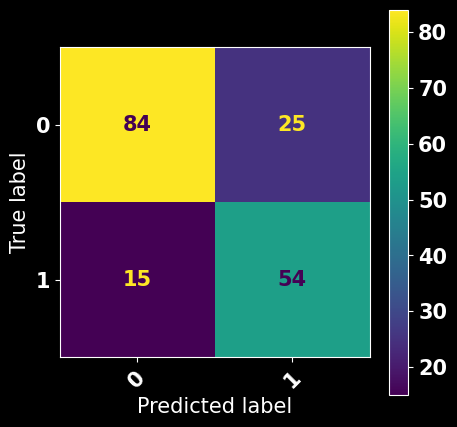

In [ ]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= [0, 1])
disp.plot(xticks_rotation=45)
fig = disp.ax_.get_figure()
fig.set_figwidth(5)
fig.set_figheight(5)
plt.show()

# Calculating Accuracy, Precision, Recall and F1-Score

In [ ]:
Metrics = pd.DataFrame({"Accuracy":[accuracy_score(y_test, y_pred, normalize=True)]
,"Precision":[precision_score(y_test, y_pred, average = 'macro')]
,"Recall":[recall_score(y_test, y_pred, average = 'macro')]
,"F1-Score":[f1_score(y_test, y_pred, average = 'macro')]})


In [ ]:
Metrics

,Accuracy,Precision,Recall,F1-Score
0,0.775281,0.766015,0.776625,0.768711


# Finding Parameters by GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

In [ ]:
n_estimators=[2,4,8,16,32,64,128,256]
max_features= [2,3,4,5,6]
bootstrap = [True]
oob_score = [True] # oob_score is useful only when bootstrap is true

In [ ]:
param_grid = {'n_estimators':n_estimators,
             'max_features':max_features,
             'bootstrap':bootstrap,
             'oob_score':oob_score}

In [ ]:
k = 5
cv = KFold(n_splits=k, shuffle = True)
rfGSCV = RandomForestClassifier()
GS = GridSearchCV(rfGSCV,param_grid, cv = cv)
GS.fit(X_train,y_train)
GS.best_params_

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too fe

{'bootstrap': True, 'max_features': 4, 'n_estimators': 16, 'oob_score': True}

In [ ]:
rf = RandomForestClassifier(n_estimators = 16, max_features = 4, oob_score = True, random_state = 101)
rf.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


RandomForestClassifier(max_features=4, n_estimators=16, oob_score=True,
                       random_state=101)

In [ ]:
y_pred_GS = rf.predict(X_test)

In [ ]:
Accuracy = np.mean(y_pred_GS == y_test) * 100
print("Avg accuracy : %2.2f" % (Accuracy))

Avg accuracy : 78.65


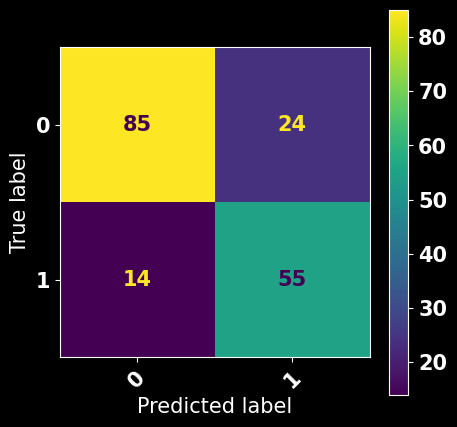

In [ ]:
cm = confusion_matrix(y_test, y_pred_GS)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= [0, 1])
disp.plot(xticks_rotation=45)
fig = disp.ax_.get_figure()
fig.set_figwidth(5)
fig.set_figheight(5)
plt.show()

# Estimating Number of Estimators

In [ ]:
errors = []

for i in range(1,50):
    rfc = RandomForestClassifier( n_estimators = i, bootstrap=True, max_features = 4)                                                                                     # GridSearch Method.
    rfc.fit(X_train,y_train)
    preds = rfc.predict(X_test)
    err = 1 - accuracy_score(preds,y_test)
    errors.append(err)


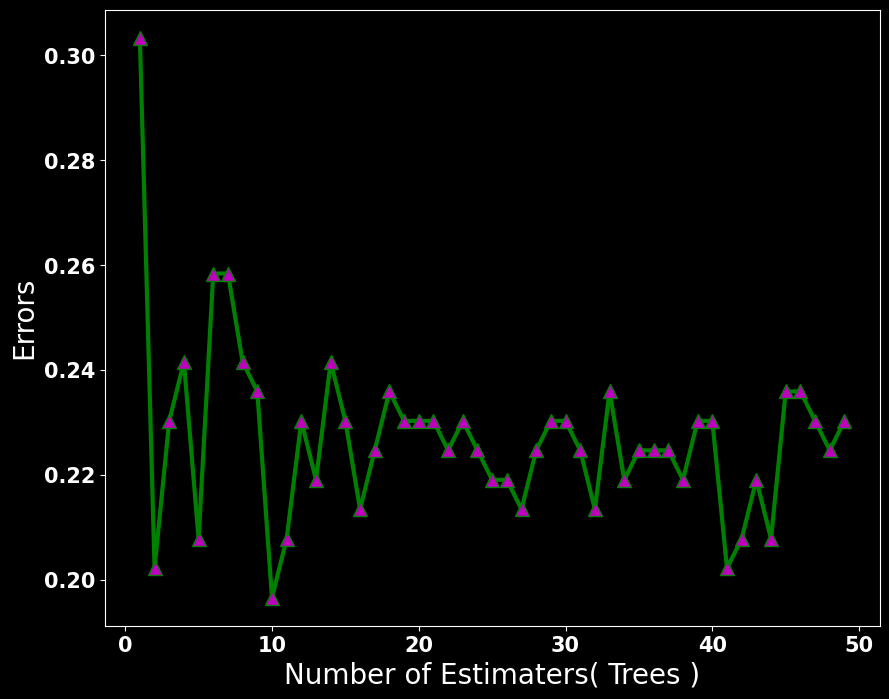

In [ ]:
plt.figure(figsize = (10,8))
plt.plot(range(1,50),errors, 'g', lw = 3, marker = "^", markersize = 10, markerfacecolor = "m")
plt.xlabel('Number of Estimaters( Trees )',fontsize = 20)
plt.ylabel('Errors',fontsize = 20)
plt.show()


In [ ]:
rf = RandomForestClassifier(n_estimators = 10, max_features = 4, oob_score = True, random_state = 101)
rf.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


RandomForestClassifier(max_features=4, n_estimators=10, oob_score=True,
                       random_state=101)

In [ ]:
y_pred = rf.predict(X_test)

In [ ]:
Accuracy = np.mean(y_pred == y_test) * 100
print("Avg accuracy : %2.2f" % (Accuracy))

Avg accuracy : 79.78
